In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Microsoft_Stock.csv')
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [3]:
df=df[['Date','Open']]
df

,Date,Open
0,4/1/2015 16:00:00,40.60
1,4/2/2015 16:00:00,40.66
2,4/6/2015 16:00:00,40.34
3,4/7/2015 16:00:00,41.61
4,4/8/2015 16:00:00,41.48
...,...,...
1506,3/25/2021 16:00:00,235.30
1507,3/26/2021 16:00:00,231.55
1508,3/29/2021 16:00:00,236.59
1509,3/30/2021 16:00:00,233.53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.7+ KB


In [5]:
df.isna().sum()

Date    0
Open    0
dtype: int64

In [6]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [7]:
df.head()

,Date,Open
0,2015-04-01,40.60
1,2015-04-02,40.66
2,2015-04-06,40.34
3,2015-04-07,41.61
4,2015-04-08,41.48


In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Open
Date,
2015-04-01,40.60
2015-04-02,40.66
2015-04-06,40.34
2015-04-07,41.61
2015-04-08,41.48


In [10]:
df.describe()

,Open
count,1511.000000
mean,107.385976
std,56.691333
min,40.340000
25%,57.860000
50%,93.990000
75%,139.440000
max,245.030000


<AxesSubplot:xlabel='Date'>

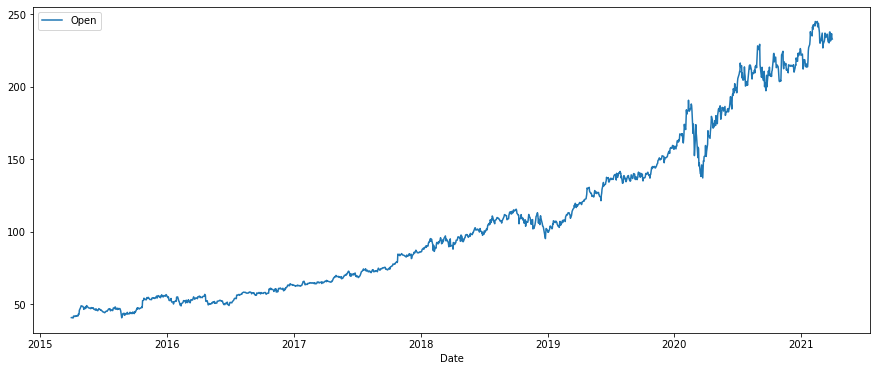

In [11]:
df.plot(figsize=(15,6))

In [12]:
rolmean=df.rolling(12).mean()
rolstd=df.rolling(12).std()
print(rolmean,rolstd)

                  Open
Date                  
2015-04-01         NaN
2015-04-02         NaN
2015-04-06         NaN
2015-04-07         NaN
2015-04-08         NaN
...                ...
2021-03-25  234.820833
2021-03-26  234.366667
2021-03-29  234.502500
2021-03-30  234.462500
2021-03-31  234.291667

[1511 rows x 1 columns]                 Open
Date                
2015-04-01       NaN
2015-04-02       NaN
2015-04-06       NaN
2015-04-07       NaN
2015-04-08       NaN
...              ...
2021-03-25  2.452058
2021-03-26  2.515640
2021-03-29  2.593394
2021-03-30  2.605355
2021-03-31  2.636788

[1511 rows x 1 columns]


Text(0.5, 1.0, 'Original,Rolling Mean and Rolling Std')

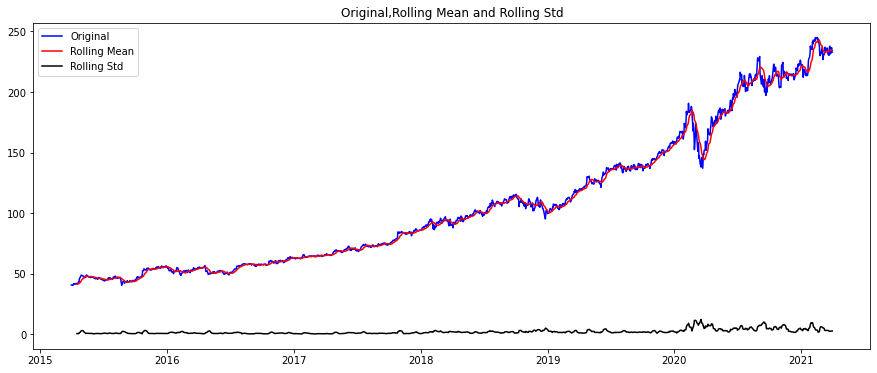

In [13]:
plt.figure(figsize=(15,6))
orig=plt.plot(df,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Original,Rolling Mean and Rolling Std')

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(open):
    result=adfuller(open)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [16]:
adfuller_test(df['Open'])

ADF Test Statistic : 0.8239150328103286
p-value : 0.9920125565435898
#Lags Used : 2
Number of Observations Used : 1508
weak evidence against null hypothesis,indicating it is non-stationary 


In [17]:
df['Open First Difference'] = df['Open'] - df['Open'].shift(1)

In [18]:
## Again test dickey fuller test
adfuller_test(df['Open First Difference'].dropna())

ADF Test Statistic : -9.91356513937032
p-value : 3.1226582463673186e-17
#Lags Used : 24
Number of Observations Used : 1485
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Text(0.5, 1.0, 'Diff1 Original,Rolling Mean and Rolling Std')

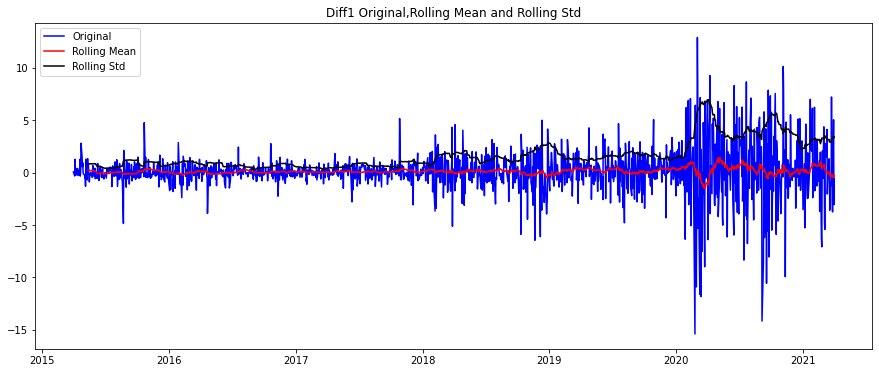

In [19]:
rolmeandiff1=df['Open First Difference'].rolling(30).mean()
rolstddiff1=df['Open First Difference'].rolling(30).std()
plt.figure(figsize=(15,6))
orig1=plt.plot(df['Open First Difference'],color='blue',label='Original')
mean1=plt.plot(rolmeandiff1,color='red',label='Rolling Mean')
std1=plt.plot(rolstddiff1,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Diff1 Original,Rolling Mean and Rolling Std')

In [20]:
df['Open Second Difference'] = df['Open First Difference'] - df['Open First Difference'].shift(1)
adfuller_test(df['Open Second Difference'].dropna())

ADF Test Statistic : -16.045268302966434
p-value : 5.854198328755157e-29
#Lags Used : 18
Number of Observations Used : 1490
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


Text(0.5, 1.0, 'Diff2 Original,Rolling Mean and Rolling Std')

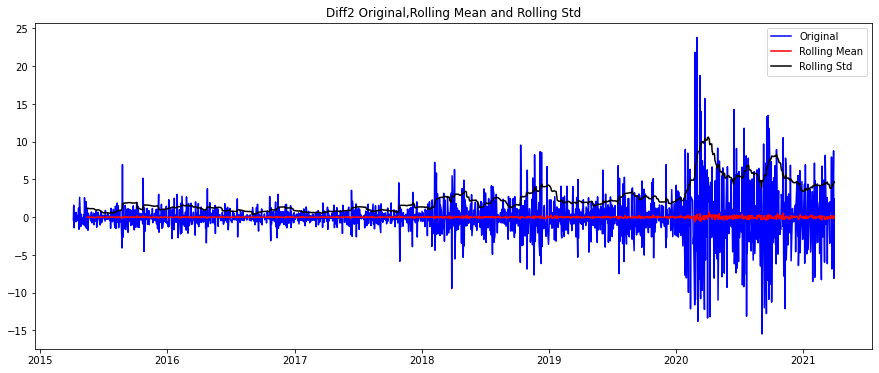

In [21]:
rolmeandiff2=df['Open Second Difference'].rolling(30).mean()
rolstddiff2=df['Open Second Difference'].rolling(30).std()
plt.figure(figsize=(15,6))
orig2=plt.plot(df['Open Second Difference'],color='blue',label='Original')
mean2=plt.plot(rolmeandiff2,color='red',label='Rolling Mean')
std2=plt.plot(rolstddiff2,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title('Diff2 Original,Rolling Mean and Rolling Std')

In [22]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

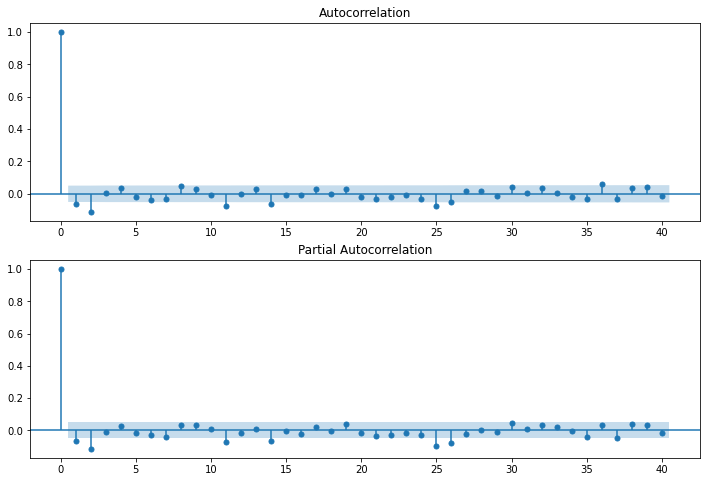

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Open First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Open First Difference'].dropna(),lags=40,ax=ax2)

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(df['Open First Difference'].dropna(),order=(2,1,2))
model_fit=model.fit()

C:\Users\Suraj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Suraj\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


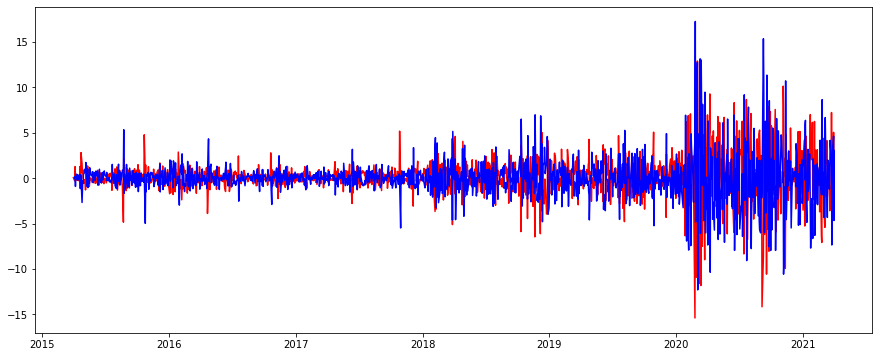

In [26]:
plt.figure(figsize=(15,6))
plt.plot(df['Open First Difference'],color='red')
plt.plot(model_fit.fittedvalues,color='blue')

In [27]:
df['error']=(model_fit.fittedvalues-df['Open First Difference'])**2
df=df.dropna()
df['error'].sum()

13867.88384027169

In [28]:
pred=pd.Series(model_fit.fittedvalues,copy=True)
print(pred.head())

Date
2015-04-06    0.000156
2015-04-07    0.182347
2015-04-08   -0.913398
2015-04-09    0.269091
2015-04-10    0.443256
dtype: float64


In [29]:
pred_1=df['Open'].shift()+pred
pred_1

Date
2015-04-06           NaN
2015-04-07     40.522347
2015-04-08     40.696602
2015-04-09     41.749091
2015-04-10     41.693256
                 ...    
2021-03-25    236.926823
2021-03-26    238.234578
2021-03-29    236.166084
2021-03-30    231.925956
2021-03-31    236.562331
Length: 1509, dtype: float64

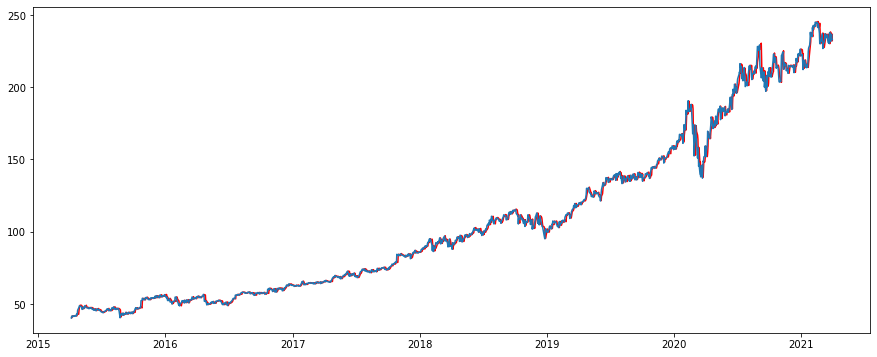

In [30]:
plt.figure(figsize=(15,6))
plt.plot(pred_1,color='red')
plt.plot(df['Open'])